# SERIE TEMPORAL

### PASOS PREVIOS A MACHINE LEARNING 

###### IMPORTO LIBRERIAS

In [15]:
import pandas as pd
import numpy as np           
import seaborn as sns         
import os 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pickle import dump

###### CARGO DATOS

In [16]:
VENTAS = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
print("data cargado bien")

data cargado bien


In [17]:
VENTAS.to_csv("VENTAS.csv", index=False)
print(VENTAS.head())

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


###### SACO VENTAS POR FECHA

In [18]:
VENTAS['date'] = pd.to_datetime(VENTAS['date'])
df = VENTAS.set_index('date')
df.head(3)

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693


######  PINTO LA SERIE 

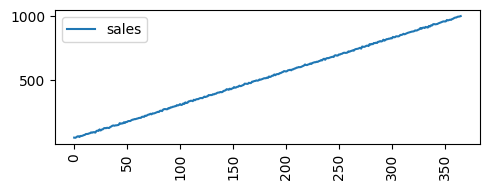

In [23]:
plt.figure(figsize=(5,2))
sns.lineplot(data=VENTAS)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###### PINTO LA TENDENCIA

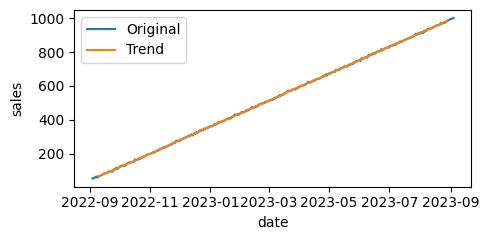

In [25]:
# Perform seasonal decomposition on the 'sales' column
decomp = seasonal_decompose(df['sales'], period=12)

# Plot the original data and the trend component
plt.figure(figsize=(5, 2.5))
sns.lineplot(data=df, x=df.index, y='sales', label='Original')
sns.lineplot(x=df.index, y=decomp.trend, label='Trend')
plt.legend()
plt.tight_layout()
plt.show()

###### ANALISIS ESTACION

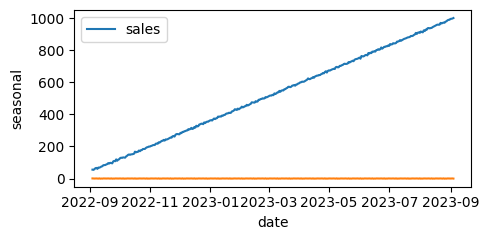

In [26]:
plt.figure(figsize=(5,2.5))
sns.lineplot(df)
sns.lineplot(decomp.seasonal)
plt.tight_layout()
plt.show()

In [38]:
def dickey_fuller_test(ventas):
    print('Dickey-Fuller test results:')
    dftest = adfuller(df, autolag = "AIC")
    adf_test = pd.Series(dftest[0:4], index=["Test Statistic:", "p-value:", "#Lags Used:", "Number of Observations Used:"])
    for key, value in dftest[4].items():
        adf_test[f'Critical value {key}:'] = value
    return adf_test

In [39]:
dickey_fuller_test(VENTAS)

Dickey-Fuller test results:


Test Statistic:                   0.545414
p-value:                          0.986190
#Lags Used:                      13.000000
Number of Observations Used:    352.000000
Critical value 1%:               -3.449065
Critical value 5%:               -2.869786
Critical value 10%:              -2.571163
dtype: float64

###### ANALISIS DE VARIACION Y AUTOCORRELACION

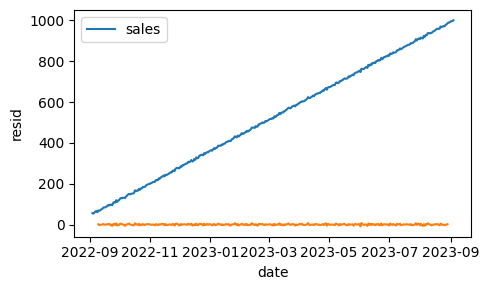

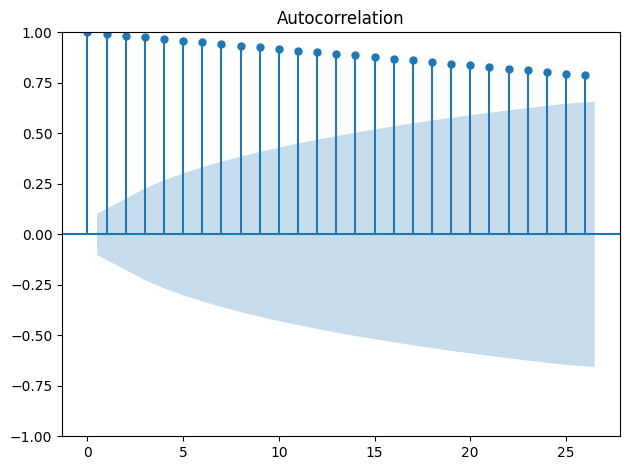

In [42]:
plt.figure(figsize=(5,3))
sns.lineplot(df)
sns.lineplot(decomp.resid)
plt.tight_layout()
plt.show() 


plot_acf(df)
plt.tight_layout()
plt.show()

## MACHINE LEARNING

In [1]:
!pip install pmdarima

  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-3.0.12-cp313-cp313-win_amd64.whl.metadata (3.6 kB)
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached Cython-3.0.12-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached setuptools-78.1.0-py3-none-any.whl (1.3 MB)
Failed to build pmdarima


  error: subprocess-exited-with-error
  
  × Building wheel for pmdarima (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [43 lines of output]
      Partial import of pmdarima during the build process.
      
      Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
      Adding extra setuptools args
      Setting up with setuptools
      Traceback (most recent call last):
        File "C:\Users\PilarHernÃ¡ndez\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "C:\Users\PilarHernÃ¡ndez\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out[

In [ ]:
%pip install pmdarima
from pmdarima import auto_arima
name = "sales_forecast"
model = auto_arima(df, seasonal=False, trace=True)
dump(model, open(f"../models/{name}_model.sav", "wb"))

In [ ]:
model.summary()

NameError: name 'model' is not defined

### PREDICCION DEL MODELO

In [ ]:
forecast = model.predict(50)
plt.figure(figsize=(5,2.5))
sns.lineplot(df)
sns.lineplot(forecast, c='red', label='forecast')
plt.tight_layout()
plt.show()

NameError: name 'model' is not defined